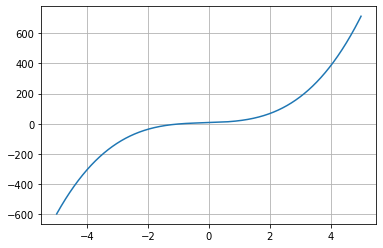

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

# Define the target polynomial 
def makeY(x):
    return 5*x**3 + 2*x**2 + 6*x +8

# this is our input vector, 20k evenly spaced points from -5 to 5
x = np.linspace(-5,5,30000)

# now generate our output values
y=makeY(x)

# and here's what it looks like
plt.plot(x,y)
plt.grid()

In [30]:
# Neural network models generally train more easily when they deal with values 
# between -1 and 1 
# Use the MMScaler to squish our data into that range
xscaler = MinMaxScaler(feature_range=(-1,1))
yscaler = MinMaxScaler(feature_range=(-1,1))

x= np.array(x)  # x was a python list and is now a vector
# the scaler doesn't want a vector it wants a 2d array 
# [] is different from [[]]
x= np.reshape(x, (x.shape[0],1)) 

# define the transform (with fit)
# use the transform (transform) to return the data
x = xscaler.fit_transform(x)  
 
y = np.array(y)
y = np.reshape(y, (y.shape[0],1))
y = yscaler.fit_transform(y)
 

In [31]:
# implement the required model with one input neuron
# one hidden layer with 3 nodes
# and one output neuron

# tanh is used because we mapped our data from -1 to 1
# if we were between 0 and 1, sigmoid would have probably worked better
# mse loss is used because this is a regression problem


model= Sequential()
model.add(Dense(3, input_shape=(1,), activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mse', optimizer=Adam(lr=0.0001), metrics=['mse'])

In [32]:
# set a large epoch count and use EarlyStopping to bail out when 
# we start to overfit

model.fit(x,y, epochs=100, validation_split=.1, callbacks=[EarlyStopping(patience=5)])

Train on 27000 samples, validate on 3000 samples
Epoch 1/100
27000/27000 [==============================] - 2s 56us/sample - loss: 0.3725 - mean_squared_error: 0.3725 - val_loss: 1.5284 - val_mean_squared_error: 1.5284
Epoch 2/100
27000/27000 [==============================] - 1s 40us/sample - loss: 0.2353 - mean_squared_error: 0.2353 - val_loss: 1.1954 - val_mean_squared_error: 1.1954
Epoch 3/100
27000/27000 [==============================] - 1s 40us/sample - loss: 0.1361 - mean_squared_error: 0.1361 - val_loss: 0.8018 - val_mean_squared_error: 0.8018
Epoch 4/100
27000/27000 [==============================] - 1s 42us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.5104 - val_mean_squared_error: 0.5104
Epoch 5/100
27000/27000 [==============================] - 1s 41us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.3435 - val_mean_squared_error: 0.3435
Epoch 6/100
27000/27000 [==============================] - 1s 42us/sample - loss: 0.0247 - mean_squar

In [33]:
# pick a new value of x within the training range
# pass the value through our polynomial
unscaled_x = np.pi
unscaled_y = makeY(unscaled_x)

# the model works with scaled inputs and produces scaled outputs
scaled_x = xscaler.transform([[unscaled_x]])
scaled_y = yscaler.transform([[unscaled_y]])
scaled_y_hat = model.predict(scaled_x)
 

print("actual scaled:  {} scaled predicted: {}".format(scaled_y, scaled_y_hat))
print("actual unscaled: {} unscaled predicted: {}".format(unscaled_y, yscaler.inverse_transform(scaled_y_hat)))


actual scaled:  [[0.2192674]] scaled predicted: [[0.2091517]]
actual unscaled: 201.62014812521656 unscaled predicted: [[194.99437]]
